In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv('train.csv')

In [2]:
df.sample(20)

,record_ID,week,store_id,sku_id,total_price,base_price,is_featured_sku,is_display_sku,units_sold
18807,26602,09/05/11,8991,547934,163.8750,163.8750,0,0,13
65121,92155,13/02/12,9178,219009,198.7875,198.7875,0,0,53
100398,142122,11/09/12,9881,219009,220.1625,220.1625,0,0,53
62900,89001,30/01/12,9279,223245,213.0375,213.0375,0,0,39
10408,14713,21/03/11,8095,216233,116.1375,132.5250,0,0,88
84135,119079,05/06/12,9809,222087,178.8375,234.4125,0,0,40
66173,93640,20/02/12,8911,222087,151.7625,227.2875,0,0,41
22486,31813,30/05/11,9281,219029,312.7875,312.7875,0,0,14
122937,174088,29/01/13,9273,222087,178.8375,249.3750,1,1,54
33359,47234,01/08/11,9876,217390,163.1625,163.1625,0,0,17


In [6]:
df[['day', 'month', 'year']] = df['week'].str.split('/', expand=True)
df = df.drop('week', axis=1)
df

,record_ID,store_id,sku_id,total_price,base_price,is_featured_sku,is_display_sku,units_sold,day,month,year
0,1,8091,216418,99.0375,111.8625,0,0,20,17,01,11
1,2,8091,216419,99.0375,99.0375,0,0,28,17,01,11
2,3,8091,216425,133.9500,133.9500,0,0,19,17,01,11
3,4,8091,216233,133.9500,133.9500,0,0,44,17,01,11
4,5,8091,217390,141.0750,141.0750,0,0,52,17,01,11
...,...,...,...,...,...,...,...,...,...,...,...
150145,212638,9984,223245,235.8375,235.8375,0,0,38,09,07,13
150146,212639,9984,223153,235.8375,235.8375,0,0,30,09,07,13
150147,212642,9984,245338,357.6750,483.7875,1,1,31,09,07,13
150148,212643,9984,547934,141.7875,191.6625,0,1,12,09,07,13


In [12]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

X, y = df.drop('units_sold', axis=1), df['units_sold']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
model = RandomForestRegressor(n_jobs=-1)
model.fit(X_train, y_train)

RandomForestRegressor(n_jobs=-1)

In [16]:
model.score(X_test, y_test)

0.776362488038056

In [17]:
from sklearn.metrics import root_mean_squared_error

y_pred = model.predict(X_test)
rmse = root_mean_squared_error(y_test, y_pred)

rmse

27.08842725572696

In [18]:
df.units_sold.describe()

count    150150.000000
mean         51.674206
std          60.207904
min           1.000000
25%          20.000000
50%          35.000000
75%          62.000000
max        2876.000000
Name: units_sold, dtype: float64

<Axes: >

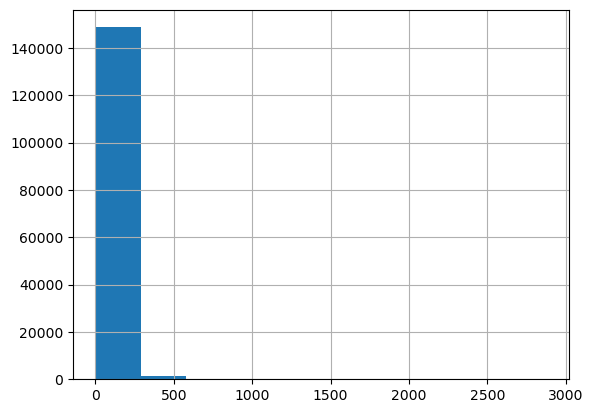

In [19]:
df.units_sold.hist()

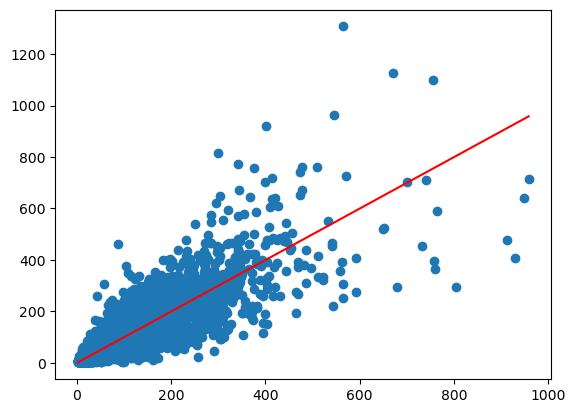

In [22]:
import matplotlib.pyplot as plt

plt.scatter(y_pred, y_test)
plt.plot(np.linspace(y_pred.min(), y_pred.max()), np.linspace(y_test.min(), y_pred.max()), color='red')

In [25]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [10, 150, 200],
    'min_samples_split': [2, 3]
}

model = RandomForestRegressor(n_jobs=-1)

grid_search = GridSearchCV(model, param_grid, verbose=2, cv=3)

grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 6 candidates, totalling 18 fits
[CV] END ...............min_samples_split=2, n_estimators=10; total time=   0.4s
[CV] END ...............min_samples_split=2, n_estimators=10; total time=   0.4s
[CV] END ...............min_samples_split=2, n_estimators=10; total time=   0.4s
[CV] END ..............min_samples_split=2, n_estimators=150; total time=   4.4s
[CV] END ..............min_samples_split=2, n_estimators=150; total time=   4.6s
[CV] END ..............min_samples_split=2, n_estimators=150; total time=   4.1s
[CV] END ..............min_samples_split=2, n_estimators=200; total time=   5.7s
[CV] END ..............min_samples_split=2, n_estimators=200; total time=   5.8s
[CV] END ..............min_samples_split=2, n_estimators=200; total time=   5.4s
[CV] END ...............min_samples_split=3, n_estimators=10; total time=   0.4s
[CV] END ...............min_samples_split=3, n_estimators=10; total time=   0.4s
[CV] END ...............min_samples_split=3, n_es

GridSearchCV(cv=3, estimator=RandomForestRegressor(n_jobs=-1),
             param_grid={'min_samples_split': [2, 3],
                         'n_estimators': [10, 150, 200]},
             verbose=2)

In [30]:
best_model = grid_search.best_estimator_

In [31]:
grid_search.best_params_

{'min_samples_split': 2, 'n_estimators': 200}

In [32]:
best_model.score(X_test, y_test)

0.7767041085716051